# I. PHẦN TỰ LUẬN

___

In [4]:
import numpy as np

## Câu 1. Các phép toán trên Vector và Matrix

### Lenght of Vector

Cách 1

In [1]:
def compute_vector_length(vector):
  len_of_vector = np.sqrt(np.sum([v**2 for v in vector]))
  return len_of_vector

Cách 2

In [ ]:
def compute_vector_length(vector):
  len_of_vector = np.linalg.norm(vector)
  return len_of_vector

### Dot Product

Cách 1

In [1]:
def compute_dot_product(vector1, vector2):
  result = np.dot(vector1, vector2)
  return result

Cách 2

In [5]:
def compute_dot_product(vector1, vector2):
  result = vector1.dot(vector2)
  return result

Cách 3

In [6]:
def compute_dot_product(vector1, vector2):
  result = vector1 @ vector2
  return result

### Matrix Multiplication with a Vector

In [7]:
def matrix_multi_vector(matrix, vector):
  result = np.dot(matrix, vector)
  return result

### Matrix Multiplication with a Matrix

In [10]:
def matrix_multi_matrix(matrix1, matrix2):
  result = np.dot(matrix1, matrix2)
  return result

### Inverse Matrix

In [12]:
def inverse_matrix(matrix):
  result = np.linalg.inv(matrix)
  return result

## Câu 2. Giá trị riêng và Vector riêng

In [14]:
def compute_eigenvalues_eigenvectors(matrix):
  eigenvalues, eigenvectors = np.linalg.eig(matrix)
  return eigenvalues,eigenvectors

## Câu 3. Độ tương tự Cosine

In [16]:
import numpy as np

def compute_cosine(v1, v2):
  cos_sim = np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))

  return cos_sim

## Câu 4. Tách nền

### Read Image

In [18]:
import cv2

ob_image = cv2.imread('.\exercise-02-Object.png')
bg1_image = cv2.imread('.\exercise-02-GreenBackground.png')
bg2_image = cv2.imread('.\exercise-02-NewBackground.jpg')

In [27]:
import matplotlib.pyplot as plt

def show_images(images, titles=None, figsize=(15, 5)):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=figsize)

    for i, img in enumerate(images):
        if isinstance(img, str):
            img = cv2.imread(img)
        
        if len(img.shape) == 2:
            axes[i].imshow(img, cmap='gray')
        else:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[i].imshow(img_rgb)

        axes[i].axis('off')
        
        if titles is not None:
            axes[i].set_title(titles[i])
    
    plt.show()

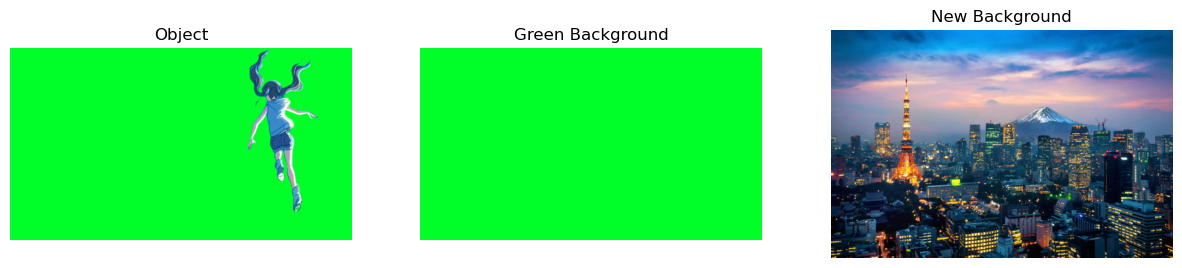

In [7]:
image_paths = [ob_image, bg1_image, bg2_image]
titles = ['Object', 'Green Background', 'New Background']
show_images(image_paths, titles)

### Resize Image

In [19]:
print(f'Object Image Size: {ob_image.shape}')
print(f'GreenBackground Image Size: {bg1_image.shape}')
print(f'NewBackground Image Size: {bg2_image.shape}')

Object Image Size: (381, 678, 3)
GreenBackground Image Size: (381, 678, 3)
NewBackground Image Size: (408, 612, 3)


Cần đưa ảnh NewBackground về cùng kích thước với 2 ảnh gốc (381, 678)

In [20]:
reference_height, reference_width = ob_image.shape[:2]

bg2_image = cv2.resize(bg2_image, (reference_width, reference_height))

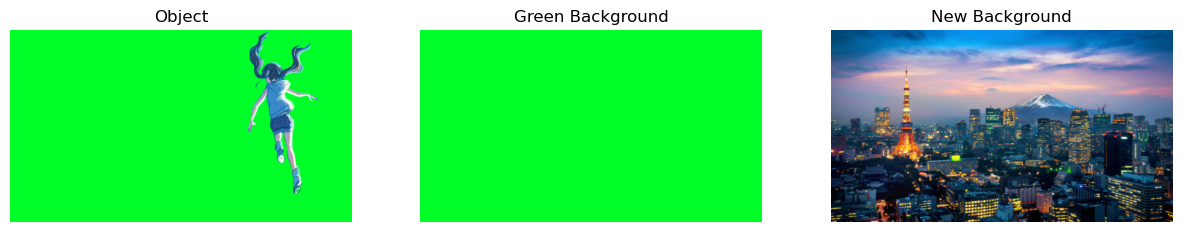

In [21]:
image_paths = [ob_image, bg1_image, bg2_image]
titles = ['Object', 'Green Background', 'New Background']
show_images(image_paths, titles)

### Difference

Tìm vị trị của đối tượng trong ảnh bẳng cách lấy ảnh đã tách nền trừ cho ảnh nền

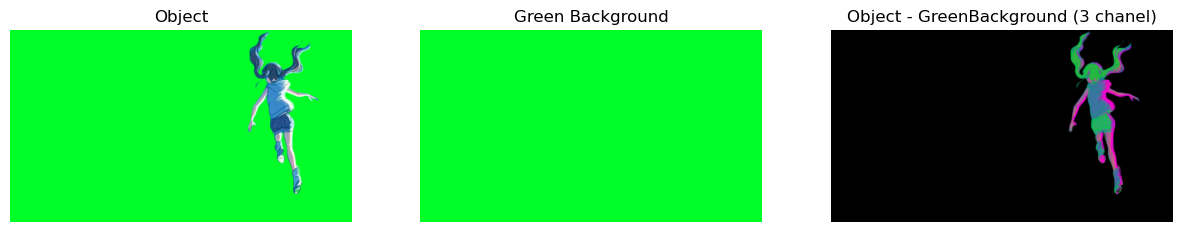

In [24]:
difference_three_channel = cv2.absdiff(ob_image, bg1_image)

image_paths = [ob_image, bg1_image, difference_three_channel]
titles = ['Object', 'Green Background', 'Object - GreenBackground (3 chanel)']
show_images(image_paths, titles)

Chuyển ảnh 3D (3 kênh màu) thành 2D (1 kênh màu) để xử lý thành ảnh nhị phân

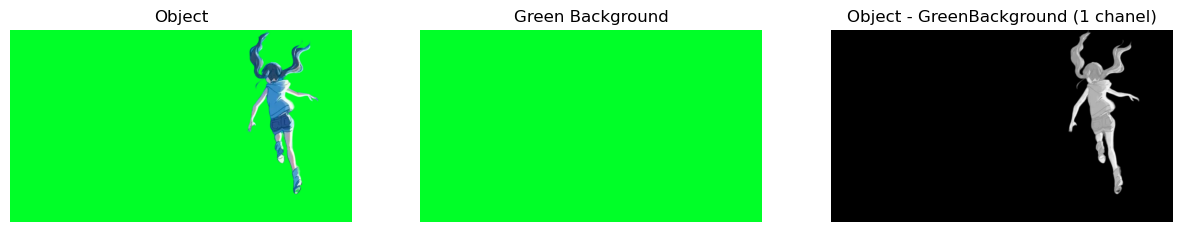

In [29]:
difference_single_channel = np.sum(difference_three_channel, axis=2) / 3.0

image_paths = [ob_image, bg1_image, difference_single_channel]
titles = ['Object', 'Green Background', 'Object - GreenBackground (1 chanel)']
show_images(image_paths, titles)

Sau các phép toán cộng trừ các ma trận, chuyển về lại kiểu dữ liệu `uint8`

In [32]:
print(type(difference_single_channel[0][0]))
difference_single_channel = difference_single_channel.astype('uint8')
print(type(difference_single_channel[0][0]))

<class 'numpy.float64'>
<class 'numpy.uint8'>


Chuyển thành ảnh nhị phân

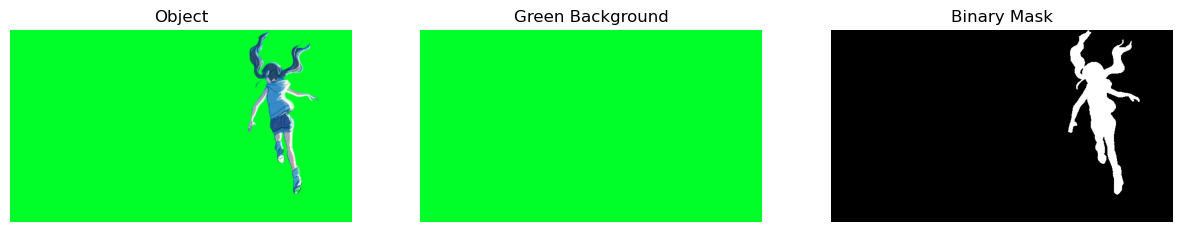

In [38]:
difference_binary = np.where(difference_single_channel > 0, 255, 0)

image_paths = [ob_image, bg1_image, difference_binary]
titles = ['Object', 'Green Background', 'Binary Mask']
show_images(image_paths, titles)

Chuyển ảnh 2D về lại 3D cho cùng kích thước với ảnh nền chuẩn bị ghép

In [39]:
difference_binary = np.stack((difference_binary,)*3, axis=-1)

### Combine

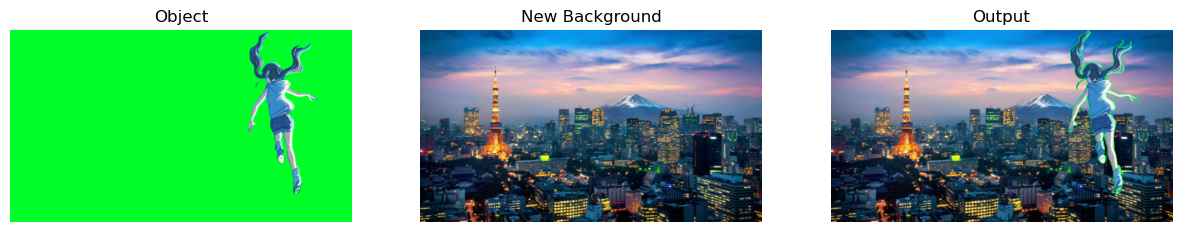

In [41]:
output_image = np.where(difference_binary==255, ob_image, bg2_image)

image_paths = [ob_image, bg2_image, output_image]
titles = ['Object', 'New Background', 'Output']
show_images(image_paths, titles)

# II. PHẦN TRẮC NGHIỆM

---

## Câu 1

In [2]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length([vector])
print(round(result, 2))

23.28


## Câu 2

In [3]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))

4


## Câu 3

In [5]:
x = np.array([[1, 2],
             [3, 4]])

k = np.array([1, 2])
print('result \n', x.dot(k))

result 
 [ 5 11]


## Câu 4

In [6]:
x = np.array([[-1, 2],
              [3, -4]])

k = np.array([1, 2])
print('result \n', x@k)

result 
 [ 3 -5]


## Câu 5

In [9]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
n = np.array([0, 2, 1])
result = matrix_multi_vector(m, n)
print(result)

[3 1]


## Câu 6

In [11]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


## Câu 7

In [9]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
result = m1@m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


## Câu 8

In [10]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1, 4))[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[5. 5. 5. 5.]


## Câu 9

In [11]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1, (-1, 4), "F")[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print(result)

[29 29 29 29]


## Câu 10

In [13]:
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


## Câu 11

In [15]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalue, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


## Câu 12

In [17]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))

0.577


----

[EXERCISE MODULE 2 - [Week 1 - 13/07/2024]](https://docs.google.com/forms/d/e/1FAIpQLSflyGIh2tbKUxxuiuIgMKoWo8PtIZXiVCLdRJJ4rqgUUOVUgQ/viewform)